In [1]:
%load_ext autoreload 
%autoreload 2 

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.utilities.pandas_helpers import filter_columns_by_search, flatten_dataframe
from src.data_processing.pipelines.ClassifierPipe import ClassifierPipe


In [367]:
DATA_PATH = "/Users/mds8301/iterm_data_storage/raw_data_raw_data.parquet.gzip"
pipe = (ClassifierPipe(DATA_PATH)
        .read_raw_data()
        .calculate_max_min_signal()
)
df = pipe.processed_data
df

,mouse_id,event,action,sensor,sex,day,trial_count,trial,signal_max,signal_min,signal_trapz,pos_signal_trapz,neg_signal_trapz
0,0,avoid,avoid,D1,F,1,1,1,3.127942,-1.445911,183.380890,307.363281,-123.982407
1,0,avoid,avoid,D1,F,3,58,0,3.953147,-0.615567,259.144684,286.607635,-27.462936
2,0,avoid,avoid,D1,F,3,59,1,0.689616,-2.415403,-462.107147,15.702945,-477.810089
3,0,avoid,avoid,D1,F,3,66,8,2.439391,-2.267414,-191.826569,139.988007,-331.814575
4,0,avoid,avoid,D1,F,3,67,9,4.573581,-0.727704,592.269287,617.723450,-25.454170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,13,shock,escape,DA,M,3,74,16,2.978387,-1.853354,-83.991547,124.251884,-208.243439
12790,13,shock,escape,DA,M,4,87,0,2.354190,-2.158833,-126.604507,125.335716,-251.940216
12791,13,shock,escape,DA,M,5,114,0,3.849639,-1.848727,113.513466,263.412811,-149.899323
12792,13,shock,escape,DA,M,6,143,0,4.559294,-2.201724,187.175278,323.180847,-136.005615


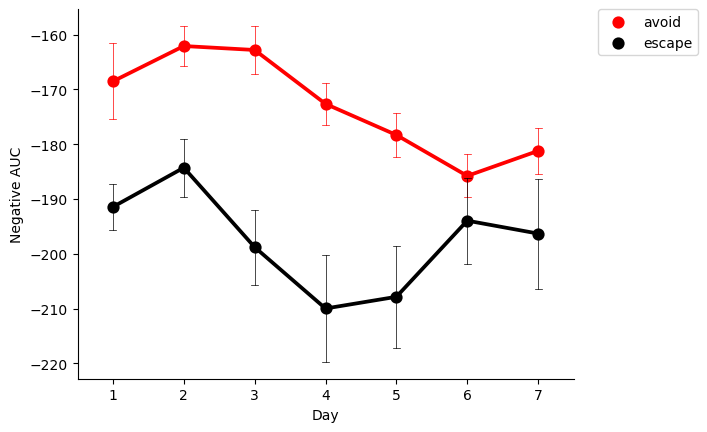

In [368]:
cols = [col for col in df.columns if col!="action"]
sns.pointplot(data = df.query("sensor=='DA' & event=='avoid' or sensor=='DA' & event=='escape'"),
            x = "day", 
            y = "neg_signal_trapz",
             hue = "event",
             errorbar='se',
             palette=["red", "black"],
             errwidth=0.5,
             capsize=0.1)
#move legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Negative AUC")
plt.xlabel("Day")
# plt.ylim(-40, -20)
sns.despine()


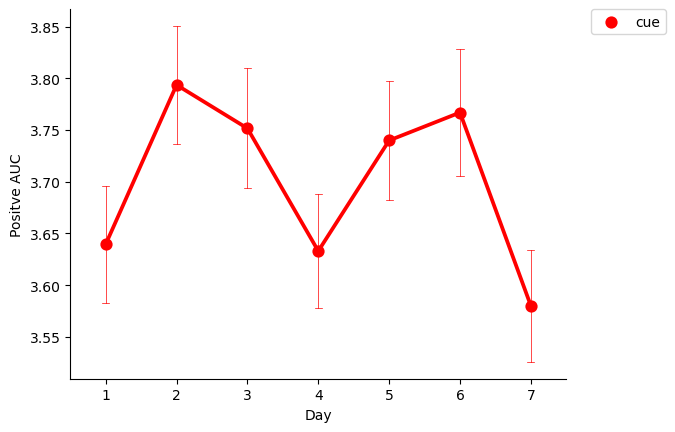

In [369]:
cols = [col for col in df.columns if col!="action"]
sns.pointplot(data = df.query("sensor=='DA' & event=='cue'"),
            x = "day", 
            y = "signal_max",
             hue = "event",
             errorbar='se',
             palette=["red", "black"],
             errwidth=0.5,
             capsize=0.1)
#move legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Positve AUC")
plt.xlabel("Day")

sns.despine()

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


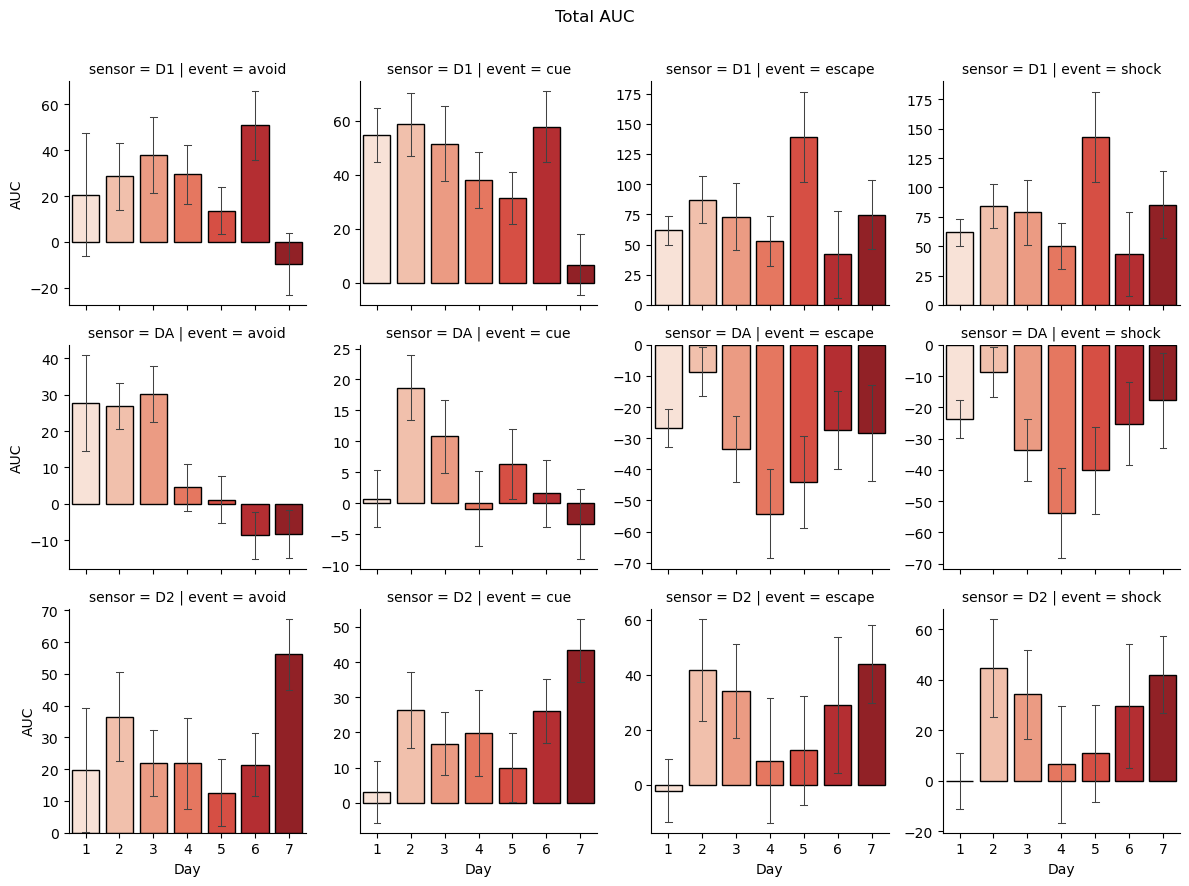

In [385]:

def plot_auc_by_day(column, title):
    grid = sns.FacetGrid(df, col = "event", row = "sensor", sharey=False)
    grid.map(sns.barplot, "day", column, errorbar = 'se', edgecolor = "k", errwidth = 0.75, capsize = 0.2, palette = 'Reds')
    grid.set_axis_labels("Day", "AUC")
    grid.fig.suptitle(title)
    grid.fig.subplots_adjust(top=0.9)
    plt.show()
plot_auc_by_day("signal_trapz", "Total AUC")

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


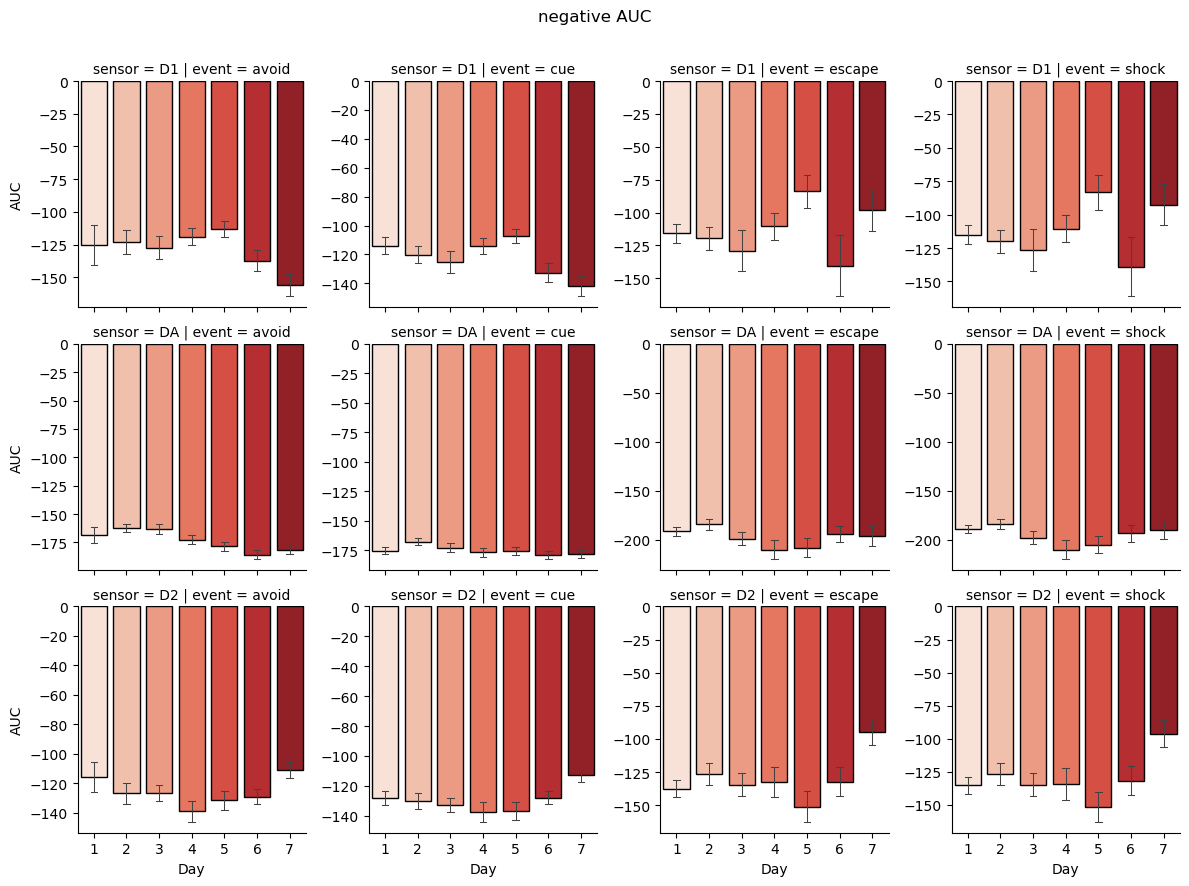

In [390]:

plot_auc_by_day("neg_signal_trapz", "negative AUC")

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


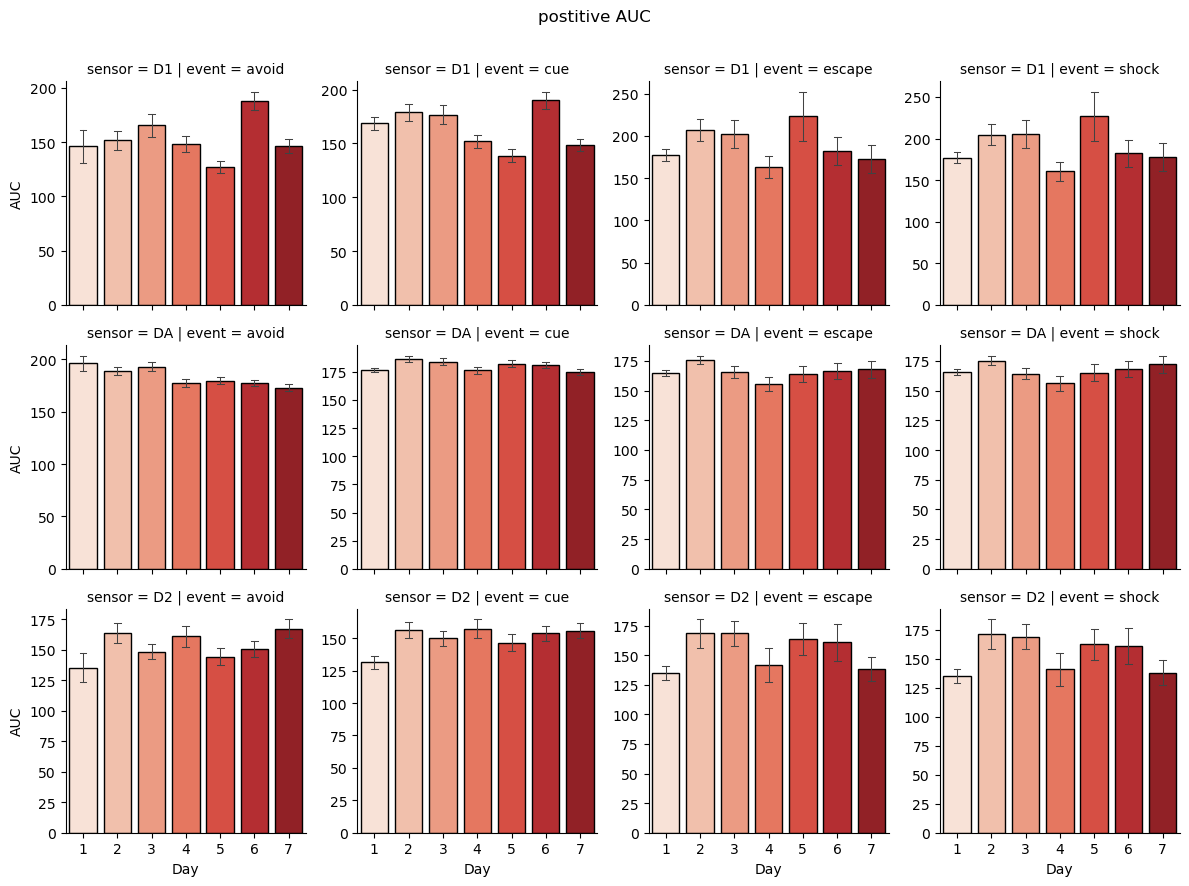

In [389]:
plot_auc_by_day("pos_signal_trapz", "postitive AUC")

In [22]:
import scipy
single_trial = pipe.raw_data.query("mouse_id==1 & event == 'cue' & day==1 & sensor=='DA'& trial==1")
single_trial

,mouse_id,day,event,sensor,time,trial,signal,action,latency,sex,learning_phase,trial_count
2966924,1,1,cue,DA,-25.000000,1,-0.318677,escape,0.0,F,0,1
2966925,1,1,cue,DA,-24.901531,1,0.306801,escape,0.0,F,0,1
2966926,1,1,cue,DA,-24.803064,1,0.528459,escape,0.0,F,0,1
2966927,1,1,cue,DA,-24.704596,1,0.144759,escape,0.0,F,0,1
2966928,1,1,cue,DA,-24.606127,1,-0.451382,escape,0.0,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2967377,1,1,cue,DA,19.606127,1,-0.212110,escape,0.0,F,0,1
2967378,1,1,cue,DA,19.704596,1,-0.315351,escape,0.0,F,0,1
2967379,1,1,cue,DA,19.803064,1,-0.602060,escape,0.0,F,0,1
2967380,1,1,cue,DA,19.901531,1,1.288783,escape,0.0,F,0,1


/var/folders/_3/4x4mtlsd3n37vfrcjmsz1vcd8clmkl/T/ipykernel_32224/111985251.py:14: RankWarning: Polyfit may be poorly conditioned
  time, fitted,_ = fit_signal(signal.signal, deg=100)


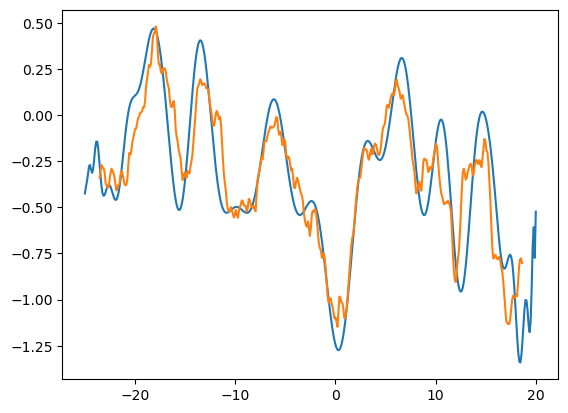

In [246]:


signal = pipe.raw_data.query("mouse_id==1 & event == 'cue' & day==7 & sensor=='DA'& trial==25")

def fit_signal(signal, deg, mean_range=20):
    signal = signal.rolling(mean_range, center=True).mean().dropna()
    time = np.linspace(-25, 20, len(signal))
    fit_poly = np.polyfit(time, signal, deg = deg)
    fit_line = np.poly1d(fit_poly)
    pred = fit_line(time)
    pred = np.pad(pred, (0, len(time) - len(pred)), 'constant', constant_values=0)
    time = np.pad(time, (0, len(pred) - len(time)), 'constant', constant_values=0)
    return time, pred, fit_poly

time, fitted,_ = fit_signal(signal.signal, deg=100)
plt.plot(time, fitted)
roll_sig = signal.signal.rolling(30, center=True).mean()
plt.plot(np.linspace(-25, 20, len(roll_sig)), roll_sig)


In [207]:
data = pipe.raw_data.groupby(by = ['mouse_id', 'day', 'event', 'sensor', 'action', 'sex', 'learning_phase', 'time'], as_index=False).agg({"signal":['mean']})
data = (data
        .pipe(flatten_dataframe).rename(columns=lambda c: c.strip("_"))
        .drop(columns='index')
)
data

,mouse_id,day,event,sensor,action,sex,learning_phase,time,signal_mean
0,0,1,avoid,D1,avoid,F,0,-25.000000,0.145588
1,0,1,avoid,D1,avoid,F,0,-24.901531,0.740007
2,0,1,avoid,D1,avoid,F,0,-24.803064,0.809107
3,0,1,avoid,D1,avoid,F,0,-24.704596,1.052871
4,0,1,avoid,D1,avoid,F,0,-24.606127,1.703075
...,...,...,...,...,...,...,...,...,...
1252167,13,7,shock,DA,avoid,M,0,19.606127,1.550692
1252168,13,7,shock,DA,avoid,M,0,19.704596,1.524243
1252169,13,7,shock,DA,avoid,M,0,19.803064,1.735290
1252170,13,7,shock,DA,avoid,M,0,19.901531,1.498784


/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plo

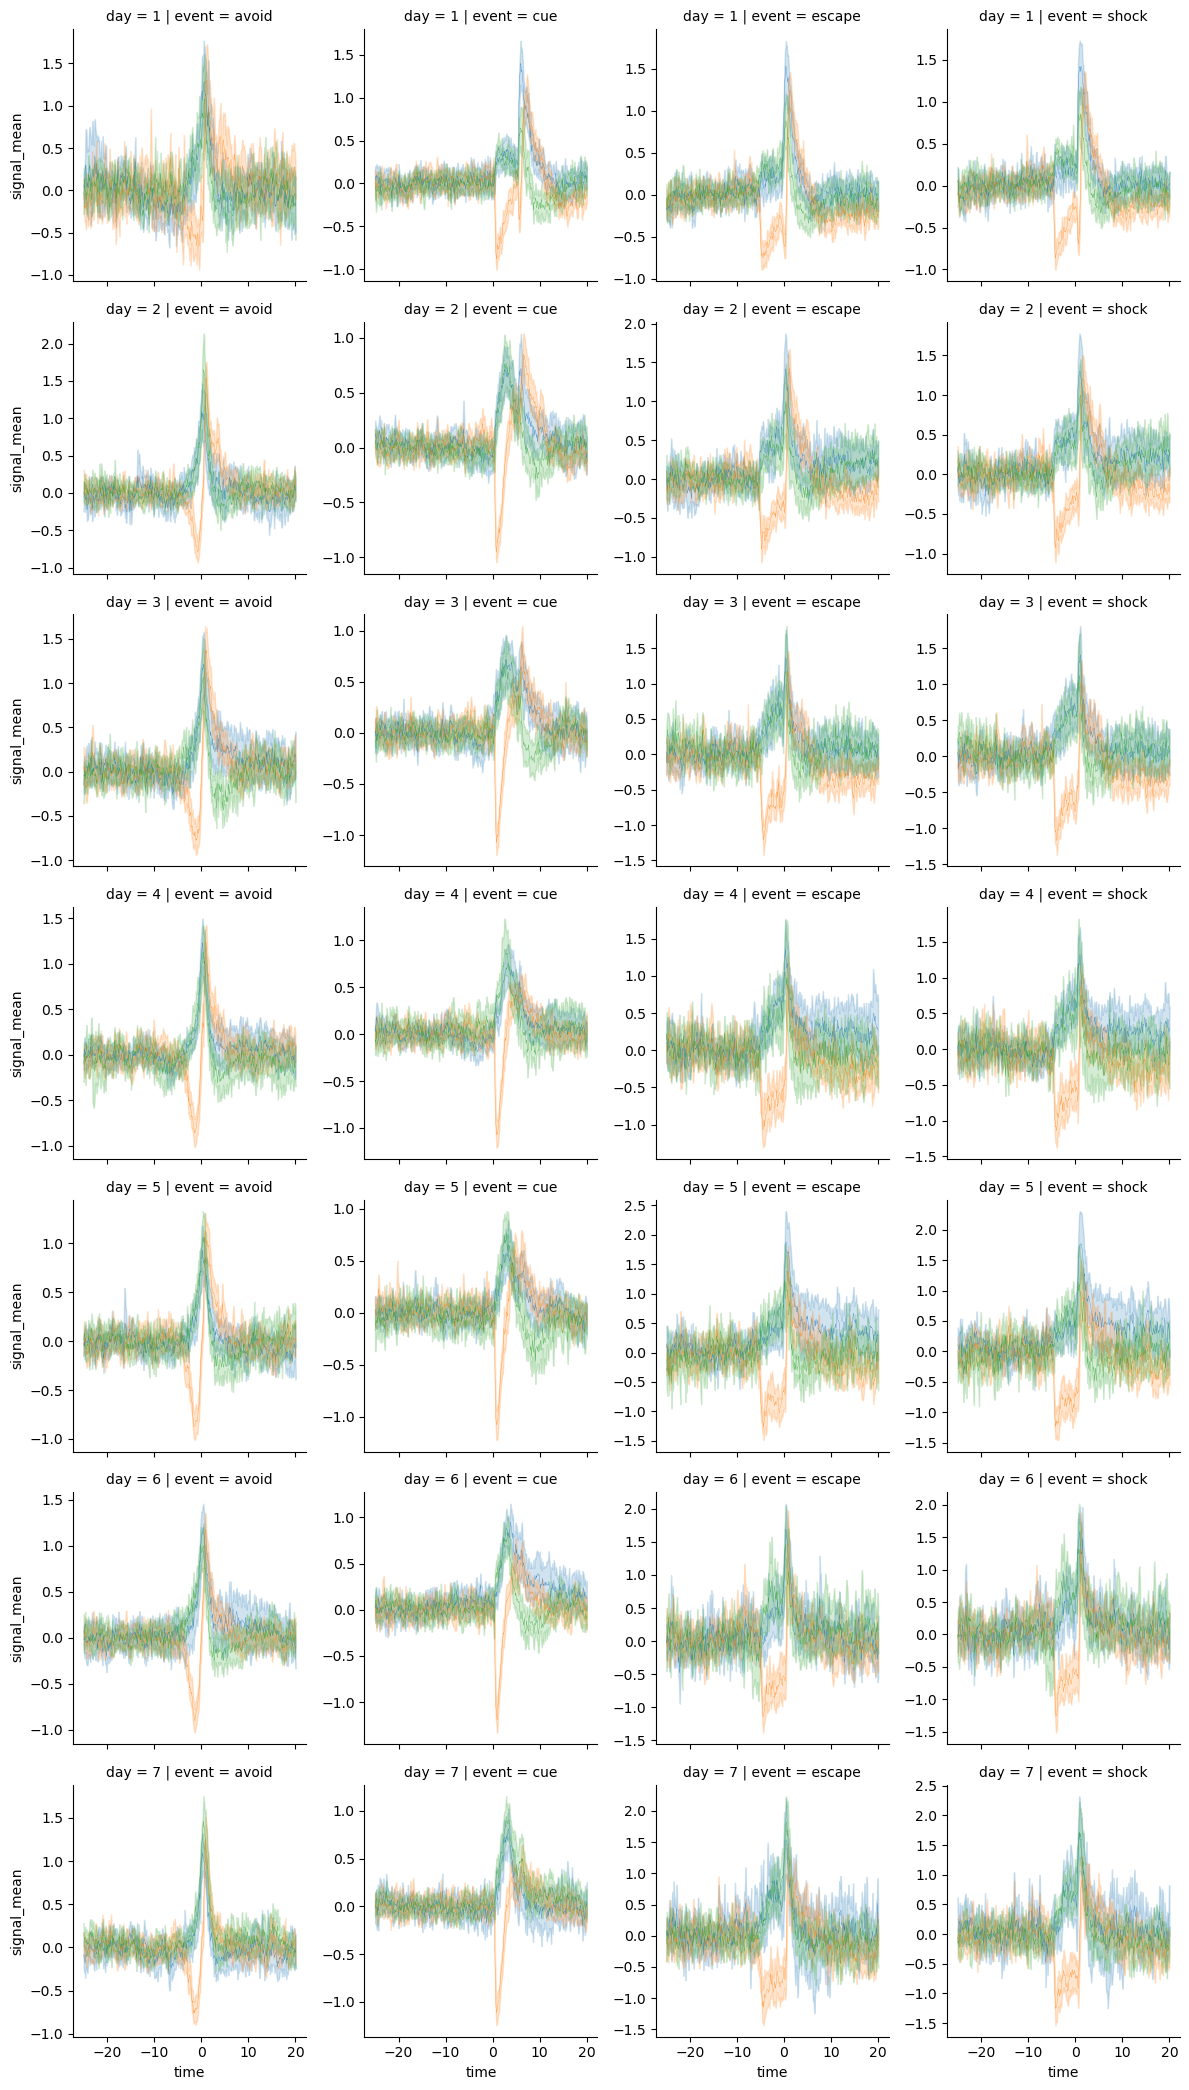

In [275]:
g = sns.FacetGrid(data, col = "event", row = "day", hue='sensor', sharey=False)
g.map(sns.lineplot, "time", "signal_mean", linewidth = 0.2, palette = "Spectral")

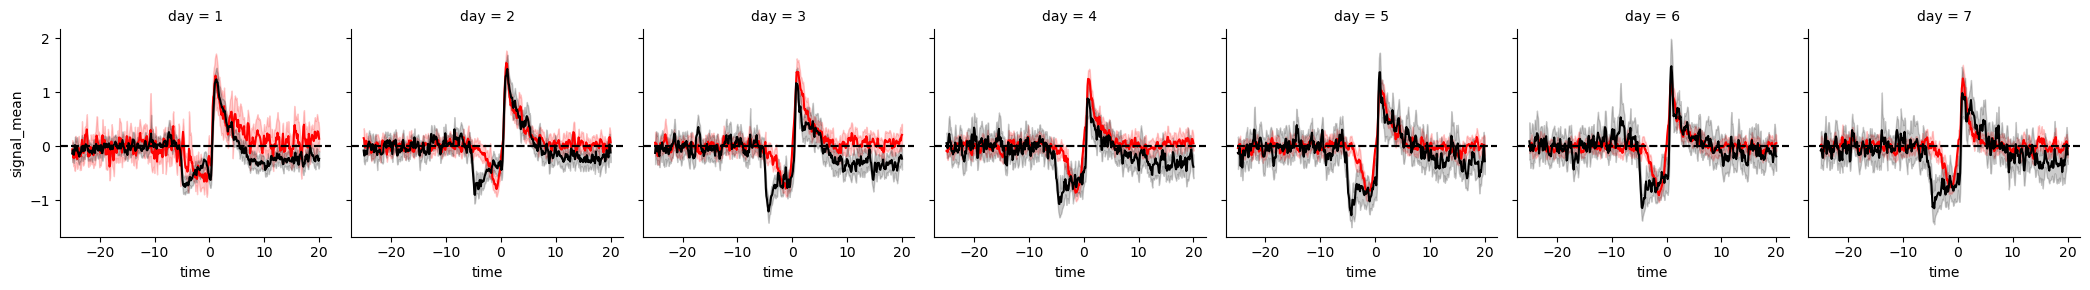

In [361]:
data = data.query('sensor=="DA" & event=="avoid" or sensor=="DA" & event=="escape"')
g = sns.FacetGrid(data = data, col = "day", hue = "event",palette = ['red', 'black'])
g.map(sns.lineplot,"time", "signal_mean")
#draw line at 0
g.map(plt.axhline, y=0, ls='--', c='black')

/Users/mds8301/anaconda3/envs/enigma/lib/python3.11/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/var/folders/_3/4x4mtlsd3n37vfrcjmsz1vcd8clmkl/T/ipykernel_32224/1686416590.py:2: RankWarning: Polyfit may be poorly conditioned
  time, fitted, coefs=fit_signal(one_trace.signal_mean, deg=200, mean_range=5)


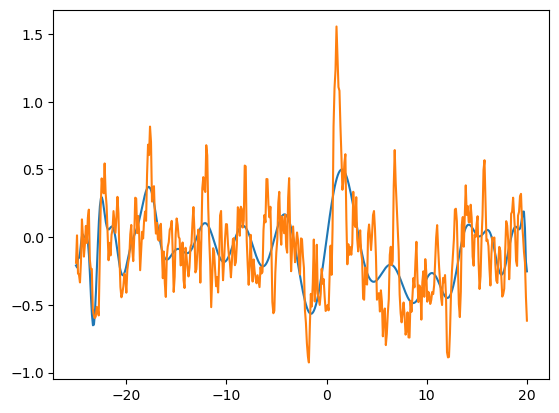

In [399]:
one_trace = data.query('mouse_id==5 & day==7 & action == "avoid" & learning_phase==0 & sensor=="DA" & event=="avoid"')
time, fitted, coefs=fit_signal(one_trace.signal_mean, deg=200, mean_range=5)
plt.plot(time, fitted)
plt.plot(one_trace.time, one_trace.signal_mean)



In [259]:
from sklearn.preprocessing import PolynomialFeatures

# Caculating time beteween min and max

In [434]:
raw = pipe.raw_data
raw.groupby(by = ['mouse_id', 'day', 'event', 'sensor', 'action', 'sex', 'learning_phase'], as_index=False).agg({"signal":['mean'],
                                                                                                                 "delta_time":calculate_d_time(raw, "signal_mean")})


AttributeError: 'DataFrame' object has no attribute 'col'

In [439]:
min = one_trace.signal_mean.min()
max = one_trace.signal_mean.max()
max_time = one_trace.query("signal_mean == @max or signal_mean == @min").time.to_numpy()
# min_time = one_trace.query("signal_mean == @min").time.to_numpy()

np.diff(max_time)
max_time

ValueError: Length of values (1) does not match length of index (5860110)

In [397]:
one_trace.iloc[0]

mouse_id                 5
day                      7
event                avoid
sensor                  DA
action               avoid
sex                      M
learning_phase           0
time                 -25.0
signal_mean      -0.189039
Name: 551432, dtype: object